<a href="https://colab.research.google.com/github/VitoriaTai/data_analytics_2/blob/main/U3MiniProjectCOVID19CASESNJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid 19 Data Analysis 

Description: The script will read the latest data from the New York Times county level COVID19 database at [https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv]. 

Aim: 
1) Filter the data for a chosen county in a chosen state.

2) Calculate the daily count of new cases and new deaths.

3) Print most recent 30 days worth of data for the selected county. 

4) Save the county's data for all dates to a comma separated value (.csv) file on your computer.

**The printed data can be copied and pasted directly into a spreadsheet for further analysis and vizualization. 

# Task 1: Environment Set up

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 

# Task 2: Data Collection 

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [58]:
data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [59]:
data.shape

(17394, 5)

In [60]:
data.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3: Data Wrangling and EDA (Exploration Data Analysis)

In [61]:
nj_data = data[data['state'] == 'New Jersey']

In [62]:
nj_data.head()

,date,state,fips,cases,deaths
292,2020-03-04,New Jersey,34,1,0
312,2020-03-05,New Jersey,34,2,0
337,2020-03-06,New Jersey,34,4,0
368,2020-03-07,New Jersey,34,4,0
403,2020-03-08,New Jersey,34,6,0


In [63]:
nj_data.shape

(315, 5)

In [64]:
nj_data.tail()

,date,state,fips,cases,deaths
17150,2021-01-08,New Jersey,34,571771,19756
17205,2021-01-09,New Jersey,34,579182,19854
17260,2021-01-10,New Jersey,34,584828,19886
17315,2021-01-11,New Jersey,34,590165,19932
17370,2021-01-12,New Jersey,34,594751,20039


In [65]:
#first death in New Jersey
firstNJDeath = nj_data[nj_data['deaths'] != 0]
firstNJDeath.head()

,date,state,fips,cases,deaths
477,2020-03-10,New Jersey,34,15,1
519,2020-03-11,New Jersey,34,23,1
566,2020-03-12,New Jersey,34,29,1
616,2020-03-13,New Jersey,34,50,1
667,2020-03-14,New Jersey,34,75,2


In [66]:
#total number of cases 
nj_data['cases'].max()

594751

In [67]:
#new cases for NJ
newCases = []
previousCase = 0
for index, row in nj_data.iterrows():
  currentCase = row['cases']
  newCaseCount = currentCase - previousCase
  previousCase = currentCase
  newCases.append(newCaseCount)
  #print(newCaseCount)

In [68]:
nj_data['newCases'] = newCases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
nj_data.head(10)

,date,state,fips,cases,deaths,newCases
292,2020-03-04,New Jersey,34,1,0,1
312,2020-03-05,New Jersey,34,2,0,1
337,2020-03-06,New Jersey,34,4,0,2
368,2020-03-07,New Jersey,34,4,0,0
403,2020-03-08,New Jersey,34,6,0,2
439,2020-03-09,New Jersey,34,11,0,5
477,2020-03-10,New Jersey,34,15,1,4
519,2020-03-11,New Jersey,34,23,1,8
566,2020-03-12,New Jersey,34,29,1,6
616,2020-03-13,New Jersey,34,50,1,21


In [70]:
nj_data['newCases'].sum()

594751

In [71]:
njCases = nj_data['cases']
njDeaths = nj_data['deaths']
njDates = nj_data['date']
njNewCases = nj_data['newCases']

In [72]:
type(njNewCases)

pandas.core.series.Series

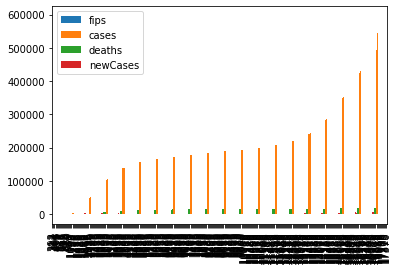

In [73]:
nj_data.plot(kind = 'bar')

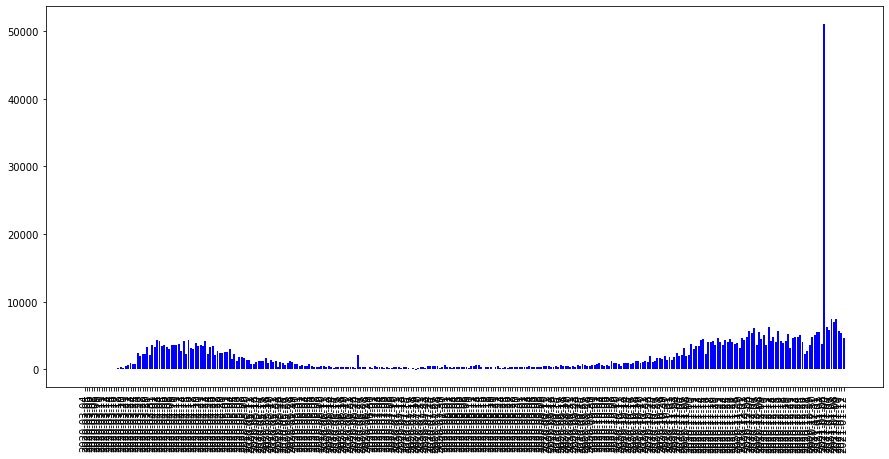

In [74]:
plt.figure(figsize = (15, 7))
plt.bar(x = njDates, height = njNewCases, color = 'blue')
plt.xticks(rotation = 90)
plt.show()

# Task 4: Understand NJ covid19 data in the last 30 days 

In [75]:
njCases30 = nj_data['cases'][-31 : -1]
njDeaths30 = nj_data['deaths'][-31 : -1]
njDates30 = nj_data['date'][-31 : -1]
njNewCases30 = nj_data['newCases'][-31 : -1]

In [76]:
#njdates30

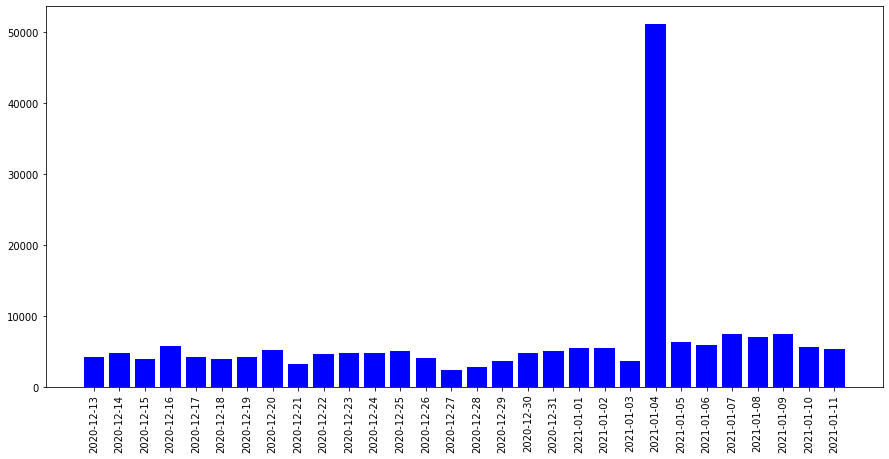

In [77]:
plt.figure(figsize = (15, 7))
plt.bar(x = njDates30, height = njNewCases30, color = 'blue')
plt.xticks(rotation = 90)
plt.show()

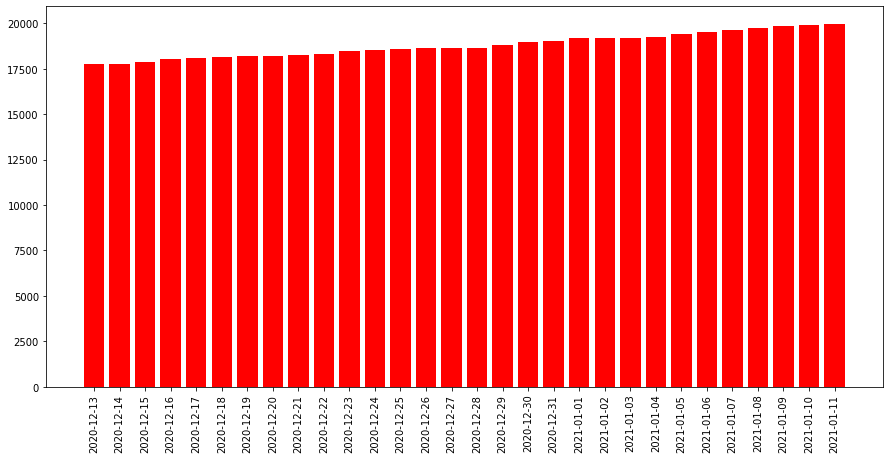

In [78]:
plt.figure(figsize = (15, 7))
plt.bar(x = njDates30, height = njDeaths30, color = 'red')
plt.xticks(rotation = 90)
plt.show()

# Comparing COVID19 data with different states

In [79]:
states = ['New York', 'California', 'Washington', 'Florida', 'New Jersey']

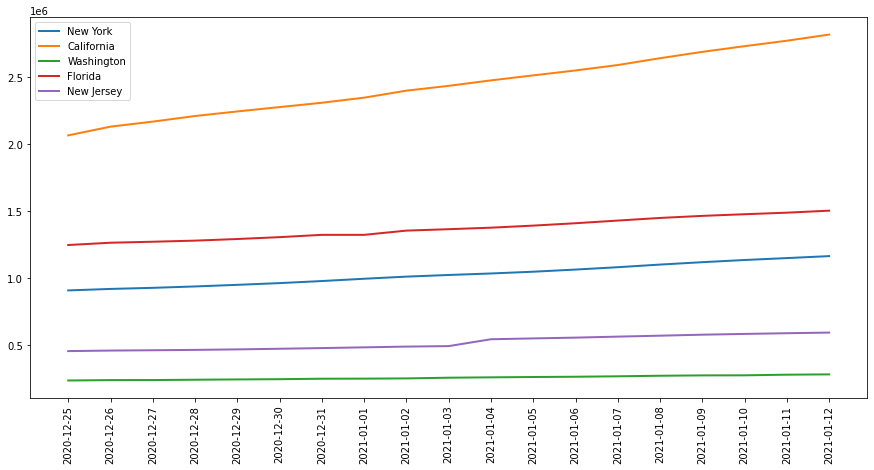

In [80]:
plt.figure(figsize = (15, 7))
for state in states:
  dataState = data[(data['state'] == state) & (data['date'] >= '2020-12-25')]
  plt.plot(dataState['date'], dataState['cases'], linewidth = 2)
  plt.xticks(rotation = 90)
plt.legend(states)
plt.show()
                    

# Conclusion

Below are the conclusions:
1.   Number of cases has been growing on a steady pace in New Jersey.  
2. It has over 594751 cases.
3. On January 4, 2021, number of new cases spiked over 40,000.
4. Although New York and New Jersey are closed neighboring states, New York surpasses New Jersey new cases by ~210,000.